数据预览：
                    输入  字符串长度                  分割结果  平均分割长度  最大分割长度  最大分割长度占比  \
0  installationpackage     19  installation|package     9.5      12      0.63   
1  systemconfiguration     19  system|configuration     9.5      13      0.68   
2   databaseconnection     18   database|connection     9.0      10      0.56   
3    administratorrole     17    administrator|role     8.5      13      0.76   
4    informationcenter     17    information|center     8.5      11      0.65   

   单个字符数量占长度比  分割长度离散度   是否乱码  
0         0.0      2.5  False  
1         0.0      3.5  False  
2         0.0      1.0  False  
3         0.0      4.5  False  
4         0.0      2.5  False  

数据集信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   输入          241 non-null    object 
 1   字符串长度       241 non-null    int64  
 2   分割结果        241 non-null    object

/Users/apple1/Desktop/kaggle/ai_book/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/Users/apple1/Desktop/kaggle/ai_book/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 31526 (\N{CJK UNIFIED IDEOGRAPH-7B26}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/Users/apple1/Desktop/kaggle/ai_book/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 20018 (\N{CJK UNIFIED IDEOGRAPH-4E32}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/Users/apple1/Desktop/kaggle/ai_book/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/Users/apple1/Desktop/kaggle/ai_book/venv/lib/python3.9/site-packages/se

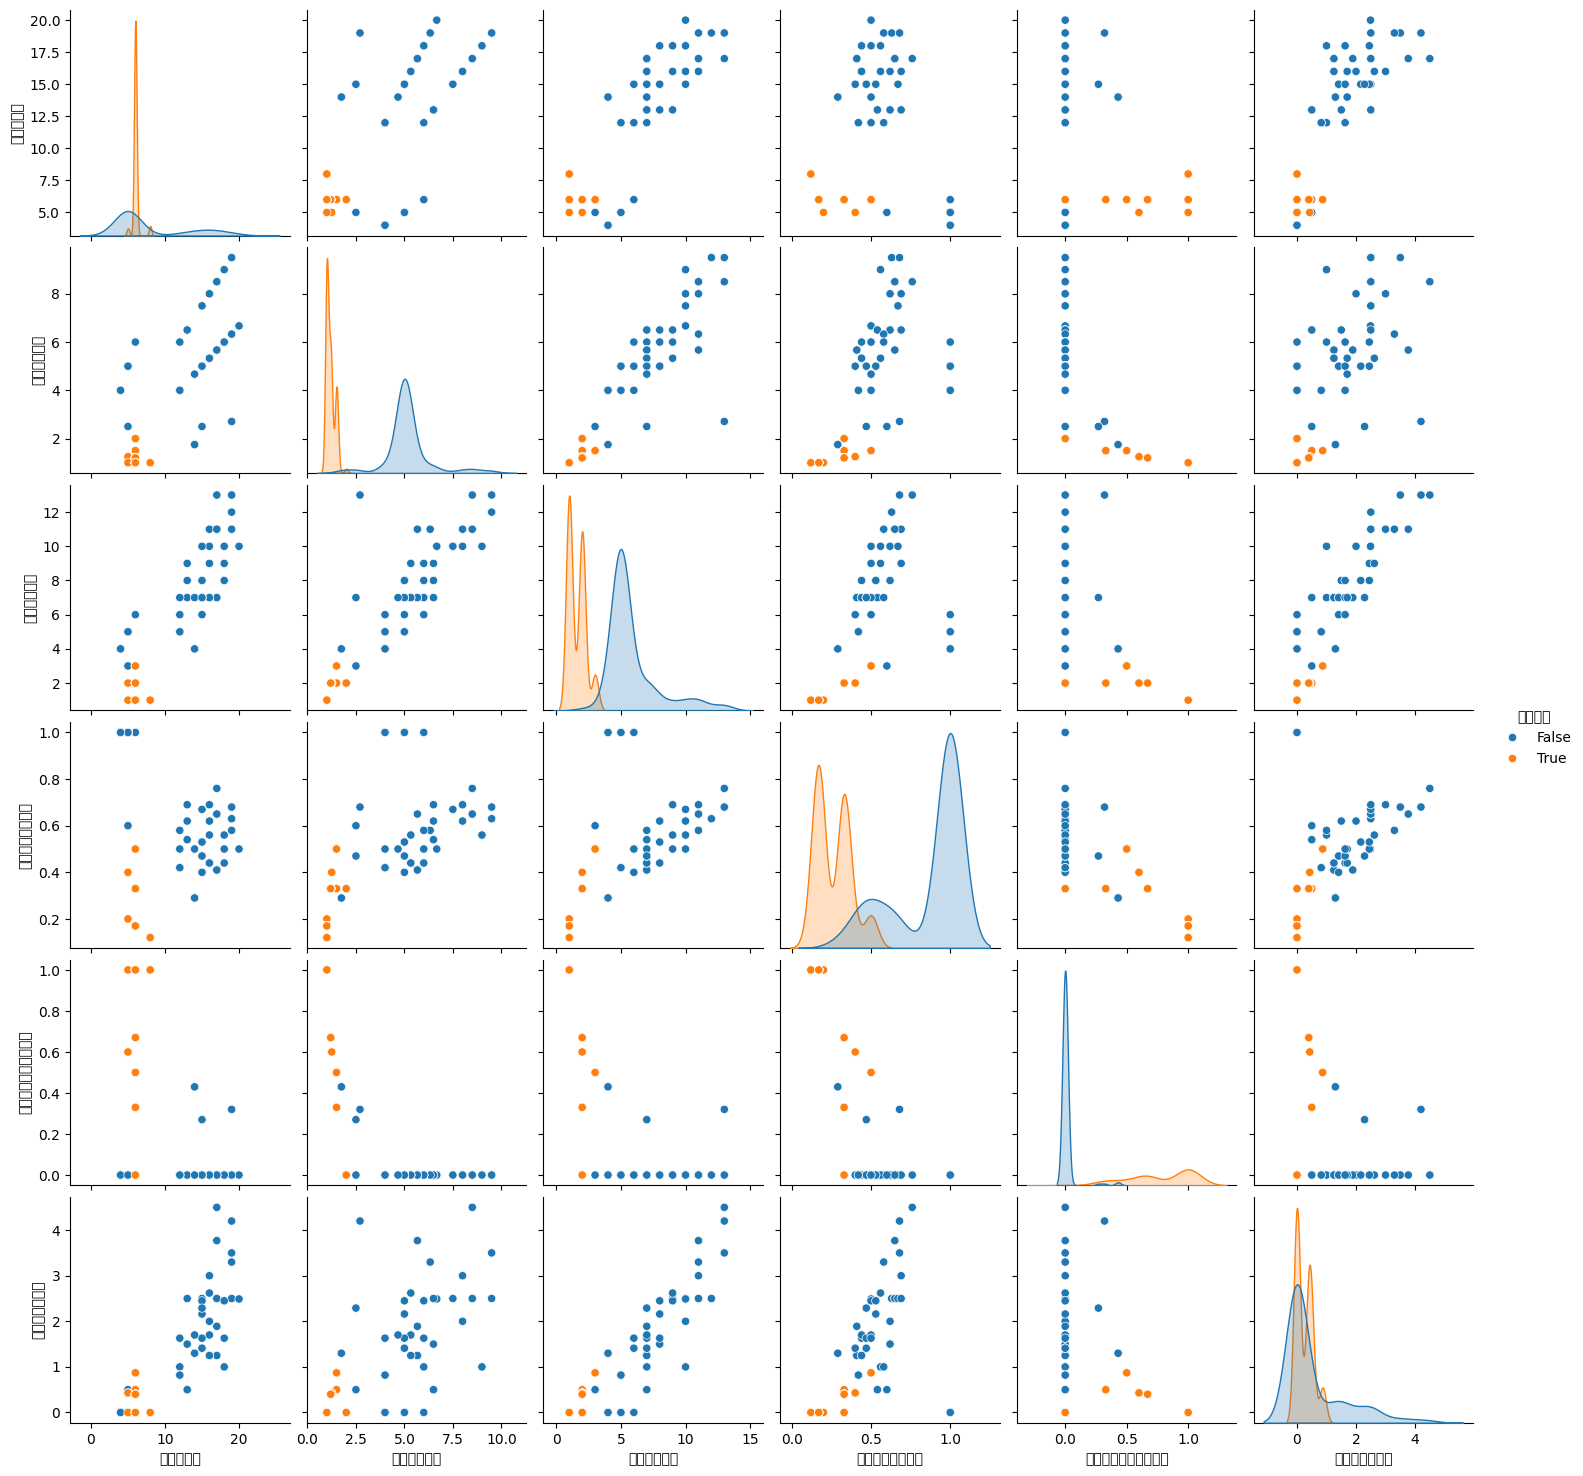

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体，优先使用常见的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 读取数据
df = pd.read_csv('tokenizer_results.csv')

# 显示前几行数据
print("数据预览：")
print(df.head())

# 基本信息
print("\n数据集信息：")
print(df.info())

print("\n描述性统计：")
print(df.describe(include='all'))

# 可视化特征分布
# 设置pairplot的字体
sns.pairplot(df, hue="是否乱码", diag_kind="kde")
plt.show()


In [7]:
# 用非交叉验证方式训练和评估决策树

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# 选择特征和目标
feature_cols = ['字符串长度', '平均分割长度', '最大分割长度', '最大分割长度占比', '单个字符数量占长度比', '分割长度离散度']
X = df[feature_cols]
y = df['是否乱码']

# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 训练决策树
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 预测
y_pred = dt.predict(X_test)

# 评估
print("非交叉验证下决策树准确率：", accuracy_score(y_test, y_pred))
print("非交叉验证下决策树分类报告：\n", classification_report(y_test, y_pred))

# 打印决策树结构
from sklearn.tree import export_text

tree_rules = export_text(dt, feature_names=feature_cols)
print("\n决策树结构如下：")
print(tree_rules)



非交叉验证下决策树准确率： 1.0
非交叉验证下决策树分类报告：
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        29
        True       1.00      1.00      1.00        20

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


决策树结构如下：
|--- 平均分割长度 <= 1.62
|   |--- class: True
|--- 平均分割长度 >  1.62
|   |--- 最大分割长度 <= 2.50
|   |   |--- class: False
|   |--- 最大分割长度 >  2.50
|   |   |--- class: False



In [4]:
# 对比不同算法（决策树、逻辑回归、集成学习）下的交叉验证准确率

from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# 选择特征和目标
feature_cols = ['字符串长度', '平均分割长度', '最大分割长度', '最大分割长度占比', '单个字符数量占长度比', '分割长度离散度']
X = df[feature_cols]
y = df['是否乱码']

# 定义模型
models = {
    "决策树": DecisionTreeClassifier(random_state=42),
    "逻辑回归": LogisticRegression(random_state=42, max_iter=1000),
    "随机森林": RandomForestClassifier(random_state=42),
    "梯度提升": GradientBoostingClassifier(random_state=42)
}

# 使用StratifiedKFold进行分层交叉验证
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=cv)
    results[name] = cv_scores
    print(f"{name} 交叉验证准确率：{cv_scores}")
    print(f"{name} 平均准确率：{cv_scores.mean():.4f}")

print("\n模型对比（平均准确率）：")
for name, scores in results.items():
    print(f"{name}: {scores.mean():.4f}")

# 以决策树为例，输出详细分类报告和规则
clf = models["决策树"]
y_pred = cross_val_predict(clf, X, y, cv=cv)
print("\n决策树整体准确率：", accuracy_score(y, y_pred))
print("决策树分类报告：\n", classification_report(y, y_pred))

# 用全部数据训练决策树并输出规则
clf.fit(X, y)
tree_rules = export_text(clf, feature_names=feature_cols)
print("决策树文本表示：\n")
print(tree_rules)

决策树 交叉验证准确率：[0.97959184 1.         1.         0.9375     1.        ]
决策树 平均准确率：0.9834
逻辑回归 交叉验证准确率：[0.97959184 1.         1.         0.9375     1.        ]
逻辑回归 平均准确率：0.9834
随机森林 交叉验证准确率：[0.97959184 1.         1.         0.9375     1.        ]
随机森林 平均准确率：0.9834
梯度提升 交叉验证准确率：[0.97959184 1.         1.         0.9375     1.        ]
梯度提升 平均准确率：0.9834

模型对比（平均准确率）：
决策树: 0.9834
逻辑回归: 0.9834
随机森林: 0.9834
梯度提升: 0.9834

决策树整体准确率： 0.983402489626556
决策树分类报告：
               precision    recall  f1-score   support

       False       0.99      0.98      0.99       145
        True       0.97      0.99      0.98        96

    accuracy                           0.98       241
   macro avg       0.98      0.98      0.98       241
weighted avg       0.98      0.98      0.98       241

决策树文本表示：

|--- 平均分割长度 <= 1.62
|   |--- class: True
|--- 平均分割长度 >  1.62
|   |--- 最大分割长度 <= 2.50
|   |   |--- class: False
|   |--- 最大分割长度 >  2.50
|   |   |--- class: False

